In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [316]:
pitch_df=pd.read_csv(r"C:\Users\Sam\OneDrive\Desktop\BBOps_DQ_26FellowPitch.csv")
contact_df=pd.read_csv(r"C:\Users\Sam\OneDrive\Desktop\BBOps_DQ_26FellowContact.csv")

In [317]:
#Checking if their are same column in both tables
df1_columns=pitch_df.columns
df2_columns=contact_df.columns
if all(item in df1_columns for item in df2_columns):
        df_result=pd.concat([pitch_df,contact_df],axis=1)
else:
    print("No They Don't Match")

No They Don't Match


In [318]:
# Check how many PitchIds are missing in contact_df
missing_pitchid = contact_df['PitchId'].isna().sum()
total_contact = len(contact_df)
valid_pitchid = total_contact - missing_pitchid

print(f"Total Contact Records: {total_contact}")
print(f"Records with blank PitchId: {missing_pitchid}")
print(f"Valid Contact Records with PitchId: {valid_pitchid}")

matched_pitchid = contact_df['PitchId'].dropna().isin(pitch_df['PitchId']).sum()
print(f"Valid PitchIds that exist in Pitch data: {matched_pitchid}")

Total Contact Records: 264
Records with blank PitchId: 151
Valid Contact Records with PitchId: 113
Valid PitchIds that exist in Pitch data: 113


In [319]:
# Removing duplicates before merge/joining both tables 

pitch_df = pitch_df.drop_duplicates(subset=['PitchId'], keep='first')

# Merging/Joining both Tables
valid_contact_df=contact_df.dropna(subset=['PitchId'])
combined_df=pd.merge(
    pitch_df,
    valid_contact_df,
    on='PitchId',
    how='left'
)

Chaning the Dtype 

In [320]:
#Chaning Dtype for Columns UTCDate, Date
for col in ['UTCDate', 'Date']:
    combined_df[col] = pd.to_datetime(combined_df[col], errors='coerce')

#Chaning Dtype for Columns UTCTime & Time 
clean_time_utc=combined_df['UTCTime'].astype(str).str.replace(":","").str.replace(".","")
clean_time_time=combined_df['Time'].astype(str).str.replace(":","").str.replace(".","")

padded_utc=clean_time_utc.str.zfill(6)
padded_time=clean_time_time.str.zfill(6)


combined_df['UTCTime']=pd.to_datetime(padded_utc,format="%M%S%f",errors="coerce")
combined_df['Time']=pd.to_datetime(padded_time,format="%H%M%S",errors="coerce")

combined_df['UTCTime'] = combined_df['UTCTime'].dt.strftime('%H:%M.%f').str[:-3]  # Keep milliseconds
combined_df['Time'] = combined_df['Time'].dt.strftime('%H:%M:%S').str[:-3]  

In [321]:
combined_df[['UTCTime', 'Time','UTCDate', 'Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   UTCTime  299 non-null    object        
 1   Time     299 non-null    object        
 2   UTCDate  299 non-null    datetime64[ns]
 3   Date     299 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 9.5+ KB


Removing the Rows from the which shouldn't have negative index as their values

In [322]:
#Getting all columns with Neg values in their Rows
negative_values_column=[]
for col in combined_df.columns:
    values=combined_df[col]
    # Check if column is numeric and has any negative values
    if pd.api.types.is_numeric_dtype(values):
        if (values<0).any():
            negative_values_column.append(col)
negative_values_column

['VertRelAngle',
 'HorzRelAngle',
 'VertBreak',
 'InducedVertBreak',
 'HorzBreak',
 'PlateLocHeight',
 'PlateLocSide',
 'VertApprAngle',
 'HorzApprAngle',
 'pfxx',
 'pfxz',
 'x0',
 'vx0',
 'vy0',
 'vz0',
 'ax0',
 'az0',
 'SpeedDrop',
 'PitchTrajectoryXc1',
 'PitchTrajectoryYc1',
 'PitchTrajectoryYc2',
 'PitchTrajectoryZc0',
 'PitchTrajectoryZc1',
 'PitchTrajectoryZc2',
 'CatchPositionZ',
 'ThrowPositionX',
 'ThrowPositionZ',
 'BasePositionZ',
 'ThrowTrajectoryXc0',
 'ThrowTrajectoryXc2',
 'ThrowTrajectoryYc2',
 'ThrowTrajectoryZc0',
 'ThrowTrajectoryZc1',
 'ThrowTrajectoryZc2',
 'Angle',
 'Direction',
 'PositionAt110X',
 'PositionAt110Z',
 'Bearing',
 'ContactPositionX',
 'ContactPositionZ',
 'HitTrajectoryXc0',
 'HitTrajectoryXc1',
 'HitTrajectoryXc2',
 'HitTrajectoryXc3',
 'HitTrajectoryXc4',
 'HitTrajectoryXc5',
 'HitTrajectoryXc6',
 'HitTrajectoryXc7',
 'HitTrajectoryXc8',
 'HitTrajectoryYc1',
 'HitTrajectoryYc2',
 'HitTrajectoryYc3',
 'HitTrajectoryYc4',
 'HitTrajectoryYc5',
 'Hit

In [323]:
#checking wether this no_neg_cols are present In the dataframe are not 
no_neg_cols = ['SpeedDrop','CatchPositionZ','PlateLocHeight']
if any(col in no_neg_cols for col in negative_values_column):
        print('yes they are present')

yes they are present


In [324]:
mask = (
    (combined_df['SpeedDrop'] < 0) | 
    (combined_df['CatchPositionZ'] < 0) | 
    (combined_df['PlateLocHeight'] < 0)
)
print(f"Original rows: {len(combined_df)}")
print(f"Rows with negative values: {mask.sum()}")

combined_df = combined_df[~mask]
print(f"Rows after removing negative values: {len(combined_df)}")
negative_check = (
    (combined_df['SpeedDrop'] < 0) | 
    (combined_df['CatchPositionZ'] < 0) | 
    (combined_df['PlateLocHeight'] < 0)
)

if negative_check.any():
    print("❌ Still found negative values!")
else:
    print("✅ All negative values removed successfully!")

Original rows: 299
Rows with negative values: 6
Rows after removing negative values: 293
✅ All negative values removed successfully!


In [325]:
# Checking if they are still in the dataframe ! 
if ['SpeedDrop','CatchPositionZ','PlateLocHeight'] in negative_values_column:
    print("they are still in table")
else:
    print("They are not present,got deleted")

They are not present,got deleted


Checking if the Dataframe contains N/A are Error as index values

In [326]:
na_col = [col for col in combined_df.columns if (combined_df[col] == "N/A").any()]
error_col = [col for col in combined_df.columns if (combined_df[col] == "error").any()]
print("Columns with N/A values:", na_col)
print("Columns with error values:", error_col)

Columns with N/A values: []
Columns with error values: []


Finding Outliers 

In [327]:
numeric_col = combined_df.select_dtypes(include=['float64','int64']).columns
numeric_col

Index(['PitchId', 'PitcherId', 'PitcherSet', 'BatterId', 'PitchNo',
       'PAofInning_x', 'PitchofPA_x', 'HomeTeamForeignId', 'AwayTeamForeignId',
       'GameForeignId',
       ...
       'HitTrajectoryYc8', 'HitTrajectoryZc0', 'HitTrajectoryZc1',
       'HitTrajectoryZc2', 'HitTrajectoryZc3', 'HitTrajectoryZc4',
       'HitTrajectoryZc5', 'HitTrajectoryZc6', 'HitTrajectoryZc7',
       'HitTrajectoryZc8'],
      dtype='object', length=131)

RelSpeed: 1 outliers
Index([153], dtype='int64')
Index([153], dtype='int64')
--------------------------------------------------
vx0: 1 outliers
Index([134], dtype='int64')
Index([134], dtype='int64')
--------------------------------------------------

Total unique outlier records: 2


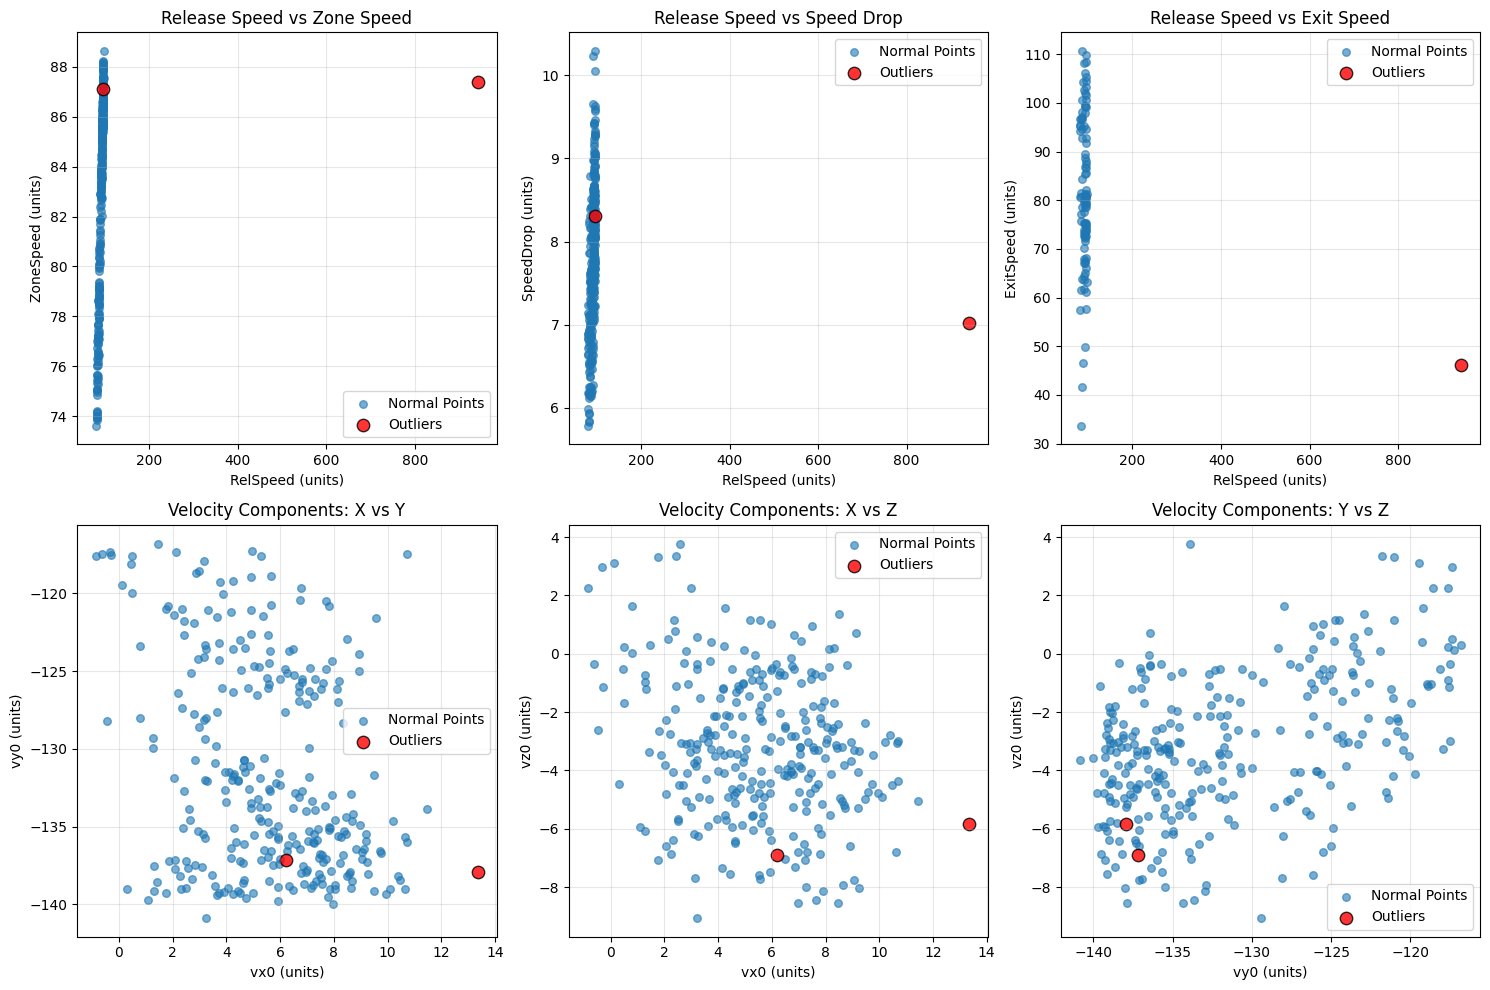

In [328]:
# only for Speed / Velocity
def detect_outliers_speed_velocity(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val = {}

    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outlier_val[col] = outliers
            outlier_indices[col] = outliers
    return outlier_indices ,  outlier_val
outlier_dict,outlier_val = detect_outliers_speed_velocity(combined_df[['RelSpeed','ZoneSpeed','SpeedDrop','ExitSpeed','vx0','vy0','vz0']])
outlier_x = [(col , idx )for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print("-"*50)


# Create outlier_indices list for dropping later
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
    outlier_indices_speed_velocity = list(set(outlier_indices))



data = combined_df[['RelSpeed','ZoneSpeed','SpeedDrop','ExitSpeed','vx0','vy0','vz0']]

# Get all outlier indices combined
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
outlier_indices = list(set(outlier_indices))

print(f"\nTotal unique outlier records: {len(outlier_indices)}")

# Create multiple 2D scatter plots to visualize relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Define meaningful pairs to plot based on speed/velocity types
plot_pairs = [
    ('RelSpeed', 'ZoneSpeed', 'Release Speed vs Zone Speed'),
    ('RelSpeed', 'SpeedDrop', 'Release Speed vs Speed Drop'),
    ('RelSpeed', 'ExitSpeed', 'Release Speed vs Exit Speed'),
    ('vx0', 'vy0', 'Velocity Components: X vs Y'),
    ('vx0', 'vz0', 'Velocity Components: X vs Z'),
    ('vy0', 'vz0', 'Velocity Components: Y vs Z')
]

for i, (x_col, y_col, title) in enumerate(plot_pairs):
    if i < len(axes):
        # Plot normal points
        normal_mask = ~data.index.isin(outlier_indices)
        axes[i].scatter(data.loc[normal_mask, x_col], 
                       data.loc[normal_mask, y_col], 
                       alpha=0.6, label='Normal Points', s=30)
        
        # Plot outlier points
        if len(outlier_indices) > 0:
            outlier_data = data.loc[outlier_indices]
            axes[i].scatter(outlier_data[x_col], 
                           outlier_data[y_col], 
                           color='red', s=80, label='Outliers', 
                           edgecolors='black', alpha=0.8)
        
        axes[i].set_xlabel(f'{x_col} (units)')
        axes[i].set_ylabel(f'{y_col} (units)')
        axes[i].set_title(title)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

plt.tight_layout()
plt.show()


In [329]:
#Drop Outlier from ['PlateLocHeight','PlateLocSide']

print(f"Before dropping: {combined_df.shape}")

combined_df = combined_df.drop(outlier_indices_speed_velocity)

print(f"After dropping: {combined_df.shape}")
print(f"Removed {len(outlier_indices_speed_velocity)} outlier rows")

Before dropping: (293, 175)
After dropping: (291, 175)
Removed 2 outlier rows


HorzApprAngle: 1 outliers
Index([237], dtype='int64')
Index([237], dtype='int64')
--------------------------------------------------


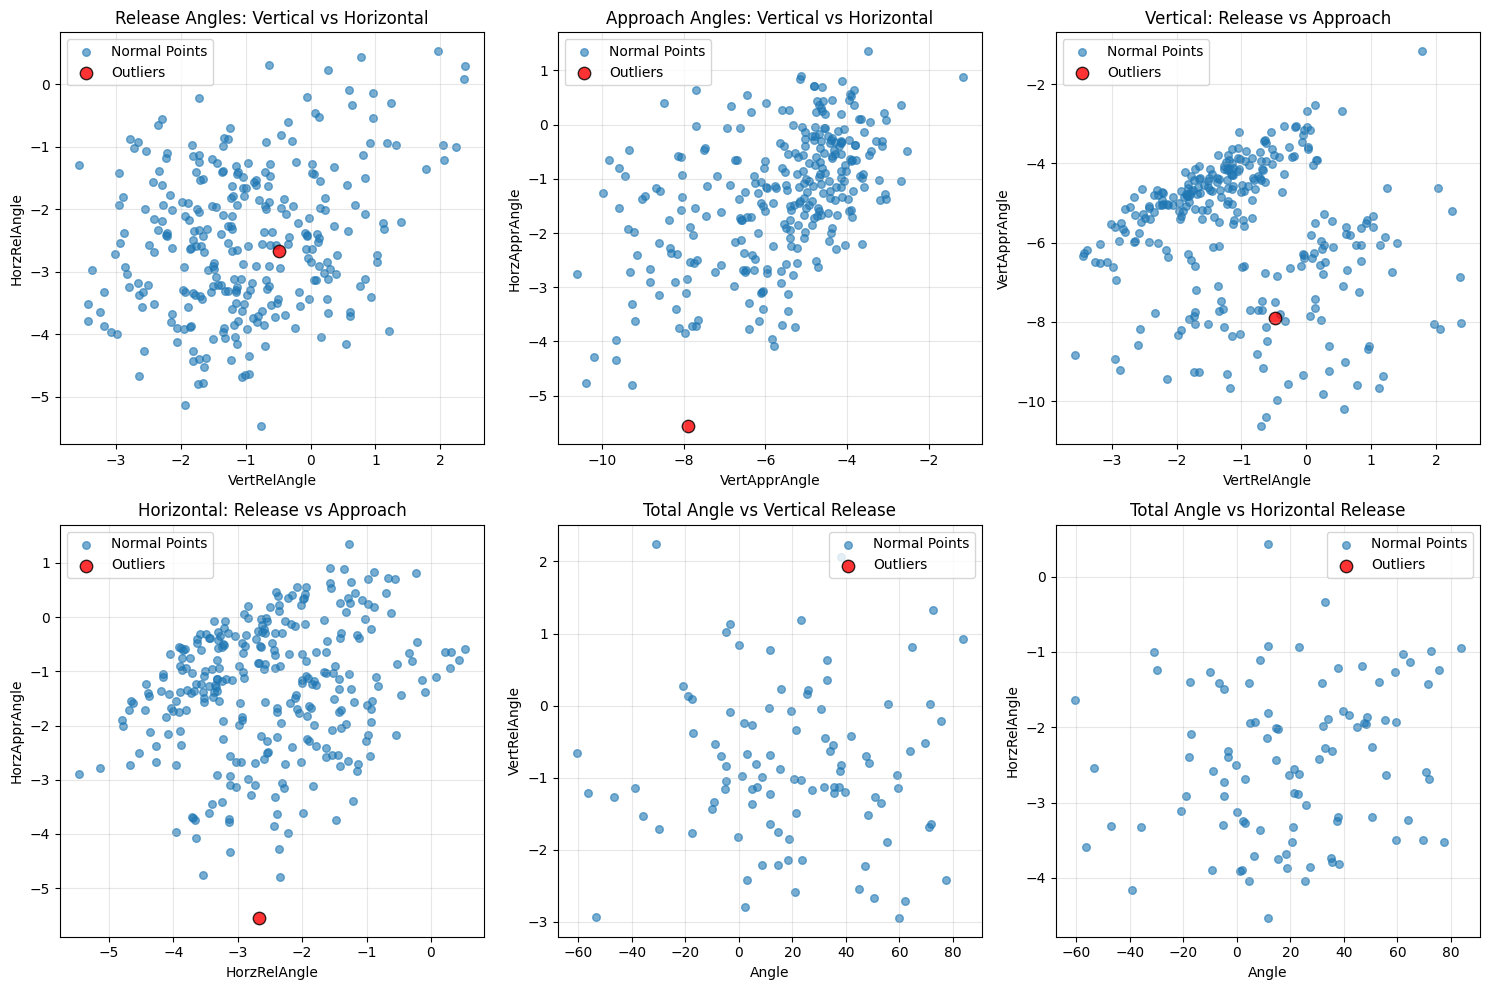

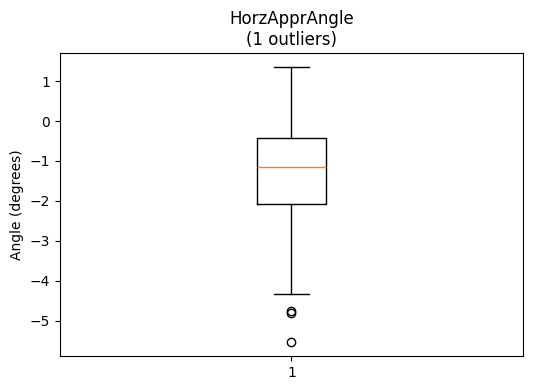

In [330]:
#only for Angles
def detect_outliers_angle(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val = {}
    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outlier_val[col] = outliers
            outlier_indices[col] = outliers
    return outlier_indices , outlier_val

outlier_dict , outlier_val= detect_outliers_angle(combined_df[['VertRelAngle','HorzRelAngle','Angle','VertApprAngle','HorzApprAngle']])
outlier_x = [(col , idx )for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print("-"*50)


# Create outlier_indices list for dropping later
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
    outlier_indices_angle= list(set(outlier_indices))


data = combined_df[['VertRelAngle','HorzRelAngle','Angle','VertApprAngle','HorzApprAngle']]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Define meaningful pairs to plot based on angle types
plot_pairs = [
    ('VertRelAngle', 'HorzRelAngle', 'Release Angles: Vertical vs Horizontal'),
    ('VertApprAngle', 'HorzApprAngle', 'Approach Angles: Vertical vs Horizontal'),
    ('VertRelAngle', 'VertApprAngle', 'Vertical: Release vs Approach'),
    ('HorzRelAngle', 'HorzApprAngle', 'Horizontal: Release vs Approach'),
    ('Angle', 'VertRelAngle', 'Total Angle vs Vertical Release'),
    ('Angle', 'HorzRelAngle', 'Total Angle vs Horizontal Release')
]

for i, (x_col, y_col, title) in enumerate(plot_pairs):
    if i < len(axes):
        # Plot normal points
        normal_mask = ~data.index.isin(outlier_indices)
        axes[i].scatter(data.loc[normal_mask, x_col], 
                       data.loc[normal_mask, y_col], 
                       alpha=0.6, label='Normal Points', s=30)
        
        # Plot outlier points
        if len(outlier_indices) > 0:
            outlier_data = data.loc[outlier_indices]
            axes[i].scatter(outlier_data[x_col], 
                           outlier_data[y_col], 
                           color='red', s=80, label='Outliers', 
                           edgecolors='black', alpha=0.8)
        
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].set_title(title)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

plt.tight_layout()
plt.show()

# Box plots for each angle variable to see outliers clearly
variables_with_outliers = [col for col in outlier_dict if len(outlier_dict[col]) > 0]

if variables_with_outliers:
    n_cols = 3
    n_rows = (len(variables_with_outliers) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(variables_with_outliers):
        axes[i].boxplot(data[col].dropna())
        axes[i].set_title(f'{col}\n({len(outlier_dict[col])} outliers)')
        axes[i].set_ylabel('Angle (degrees)')
    
    # Hide unused subplots
    for i in range(len(variables_with_outliers), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


In [331]:
#Drop Outlier from ['PlateLocHeight','PlateLocSide']

print(f"Before dropping: {combined_df.shape}")

combined_df = combined_df.drop(outlier_indices_angle)

print(f"After dropping: {combined_df.shape}")
print(f"Removed {len(outlier_indices_angle)} outlier rows")

Before dropping: (291, 175)
After dropping: (290, 175)
Removed 1 outlier rows


PitchTrajectoryXc0: 1 outliers
Index([291], dtype='int64')
Index([291], dtype='int64')
--------------------------------------------------

Total unique outlier records: 1


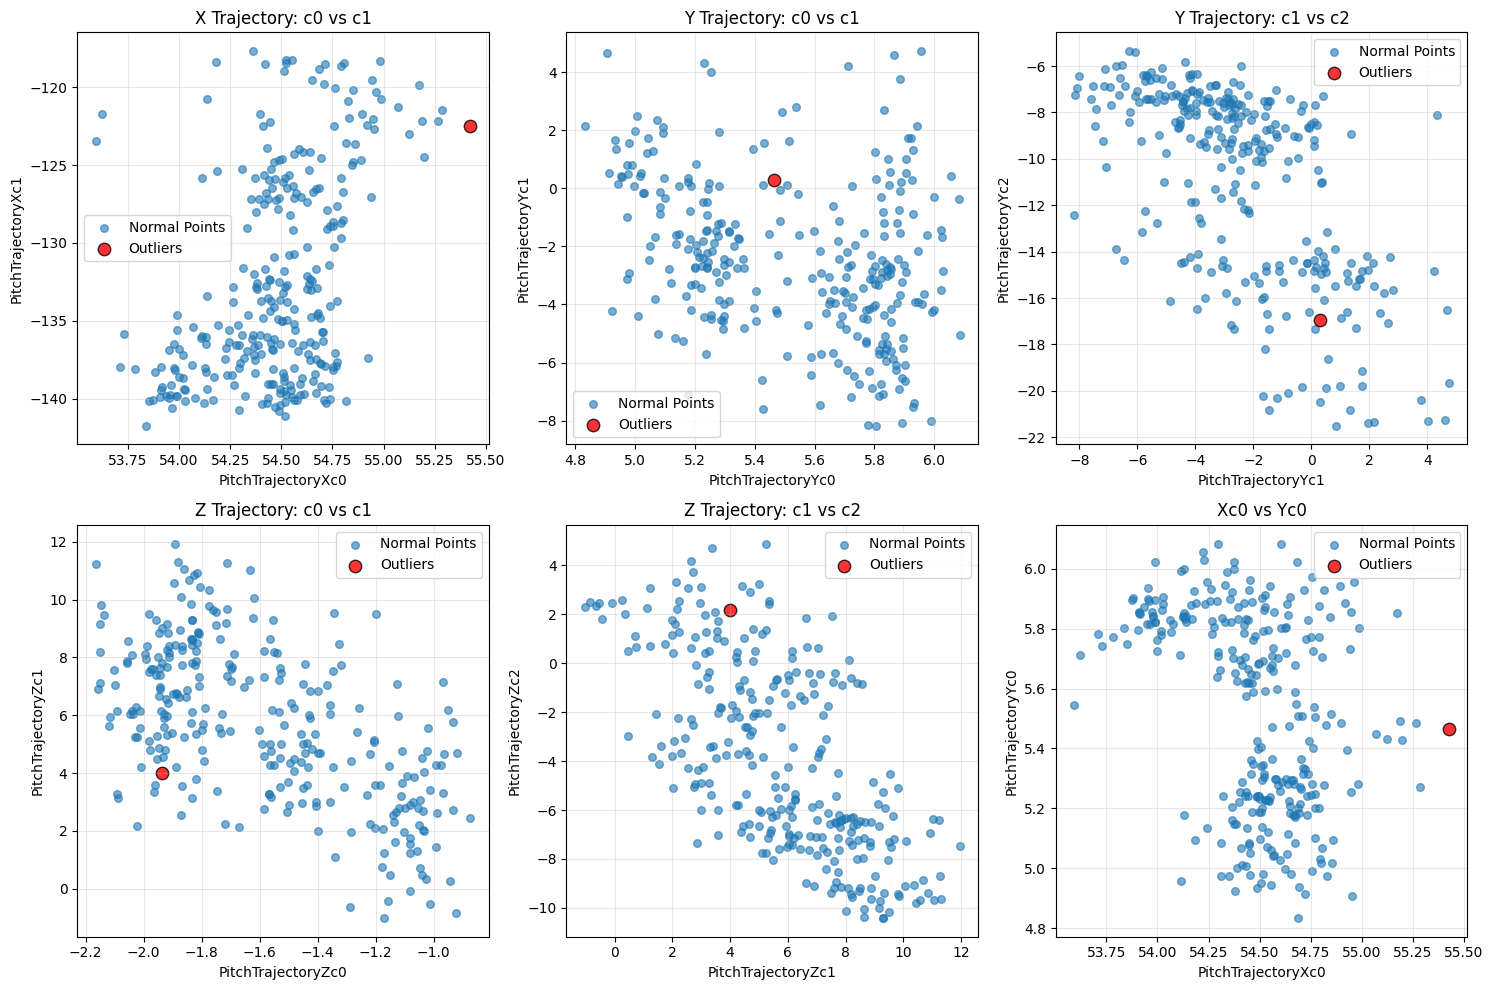

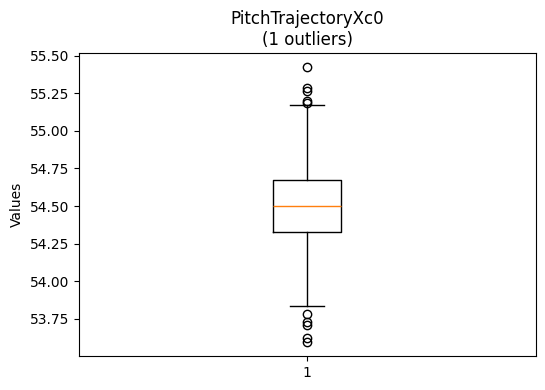

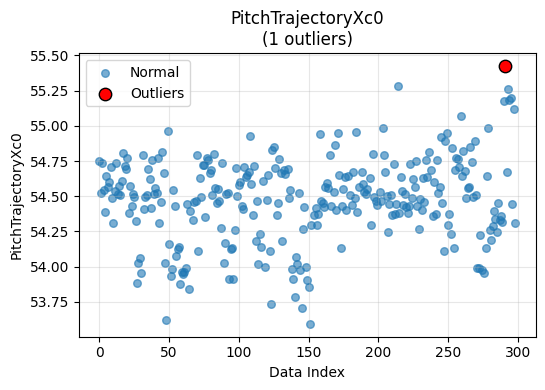

In [332]:
#only for Trajectory
def detect_outliers_trajectory(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val = {}

    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outlier_val[col] = outliers
            outlier_indices[col] = outliers
    return outlier_indices , outlier_val

outlier_dict, outlier_val = detect_outliers_trajectory(combined_df[['PitchTrajectoryXc0','PitchTrajectoryXc1','PitchTrajectoryYc0','PitchTrajectoryYc1','PitchTrajectoryYc2','PitchTrajectoryZc0','PitchTrajectoryZc1','PitchTrajectoryZc2']])
outlier_x = [(col , idx )for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print("-"*50)



# Get all outlier indices combined
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
    outlier_indices_trajectory  = list(set(outlier_indices))



# 2D Scatter Plot Visualization
data = combined_df[['PitchTrajectoryXc0','PitchTrajectoryXc1','PitchTrajectoryYc0','PitchTrajectoryYc1','PitchTrajectoryYc2','PitchTrajectoryZc0','PitchTrajectoryZc1','PitchTrajectoryZc2']]

# Create outlier_indices list for dropping later
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
    outlier_indices = list(set(outlier_indices))

print(f"\nTotal unique outlier records: {len(outlier_indices)}")

# Create multiple 2D scatter plots to visualize relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Define meaningful pairs to plot based on trajectory components
plot_pairs = [
    ('PitchTrajectoryXc0', 'PitchTrajectoryXc1', 'X Trajectory: c0 vs c1'),
    ('PitchTrajectoryYc0', 'PitchTrajectoryYc1', 'Y Trajectory: c0 vs c1'),
    ('PitchTrajectoryYc1', 'PitchTrajectoryYc2', 'Y Trajectory: c1 vs c2'),
    ('PitchTrajectoryZc0', 'PitchTrajectoryZc1', 'Z Trajectory: c0 vs c1'),
    ('PitchTrajectoryZc1', 'PitchTrajectoryZc2', 'Z Trajectory: c1 vs c2'),
    ('PitchTrajectoryXc0', 'PitchTrajectoryYc0', 'Xc0 vs Yc0')
]

for i, (x_col, y_col, title) in enumerate(plot_pairs):
    if i < len(axes):
        # Plot normal points
        normal_mask = ~data.index.isin(outlier_indices)
        axes[i].scatter(data.loc[normal_mask, x_col], 
                       data.loc[normal_mask, y_col], 
                       alpha=0.6, label='Normal Points', s=30)
        
        # Plot outlier points
        if len(outlier_indices) > 0:
            outlier_data = data.loc[outlier_indices]
            axes[i].scatter(outlier_data[x_col], 
                           outlier_data[y_col], 
                           color='red', s=80, label='Outliers', 
                           edgecolors='black', alpha=0.8)
        
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].set_title(title)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

plt.tight_layout()
plt.show()

# Box plots for each trajectory variable to see outliers clearly
variables_with_outliers = [col for col in outlier_dict if len(outlier_dict[col]) > 0]

if variables_with_outliers:
    n_cols = 3
    n_rows = (len(variables_with_outliers) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(variables_with_outliers):
        axes[i].boxplot(data[col].dropna())
        axes[i].set_title(f'{col}\n({len(outlier_dict[col])} outliers)')
        axes[i].set_ylabel('Values')
    
    # Hide unused subplots
    for i in range(len(variables_with_outliers), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Individual variable plots against index for clear outlier visualization
if variables_with_outliers:
    n_cols = 3
    n_rows = (len(variables_with_outliers) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(variables_with_outliers):
        # Normal points
        normal_indices = data.index.difference(outlier_dict[col])
        axes[i].scatter(normal_indices, data.loc[normal_indices, col], 
                       alpha=0.6, label='Normal', s=30)
        
        # Outlier points
        if len(outlier_dict[col]) > 0:
            axes[i].scatter(outlier_dict[col], data.loc[outlier_dict[col], col],
                           color='red', s=80, label='Outliers', edgecolors='black')
        
        axes[i].set_xlabel('Data Index')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'{col}\n({len(outlier_dict[col])} outliers)')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(variables_with_outliers), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()




In [333]:
#Drop Outlier from ['PitchTrajectoryXc0','PitchTrajectoryXc1','PitchTrajectoryYc0','PitchTrajectoryYc1','PitchTrajectoryYc2','PitchTrajectoryZc0','PitchTrajectoryZc1','PitchTrajectoryZc2']

print(f"Before dropping: {combined_df.shape}")

combined_df = combined_df.drop(outlier_indices_trajectory)

print(f"After dropping: {combined_df.shape}")
print(f"Removed {len(outlier_indices_trajectory)} outlier rows")

Before dropping: (290, 175)
After dropping: (289, 175)
Removed 1 outlier rows



Total unique outlier records: 0


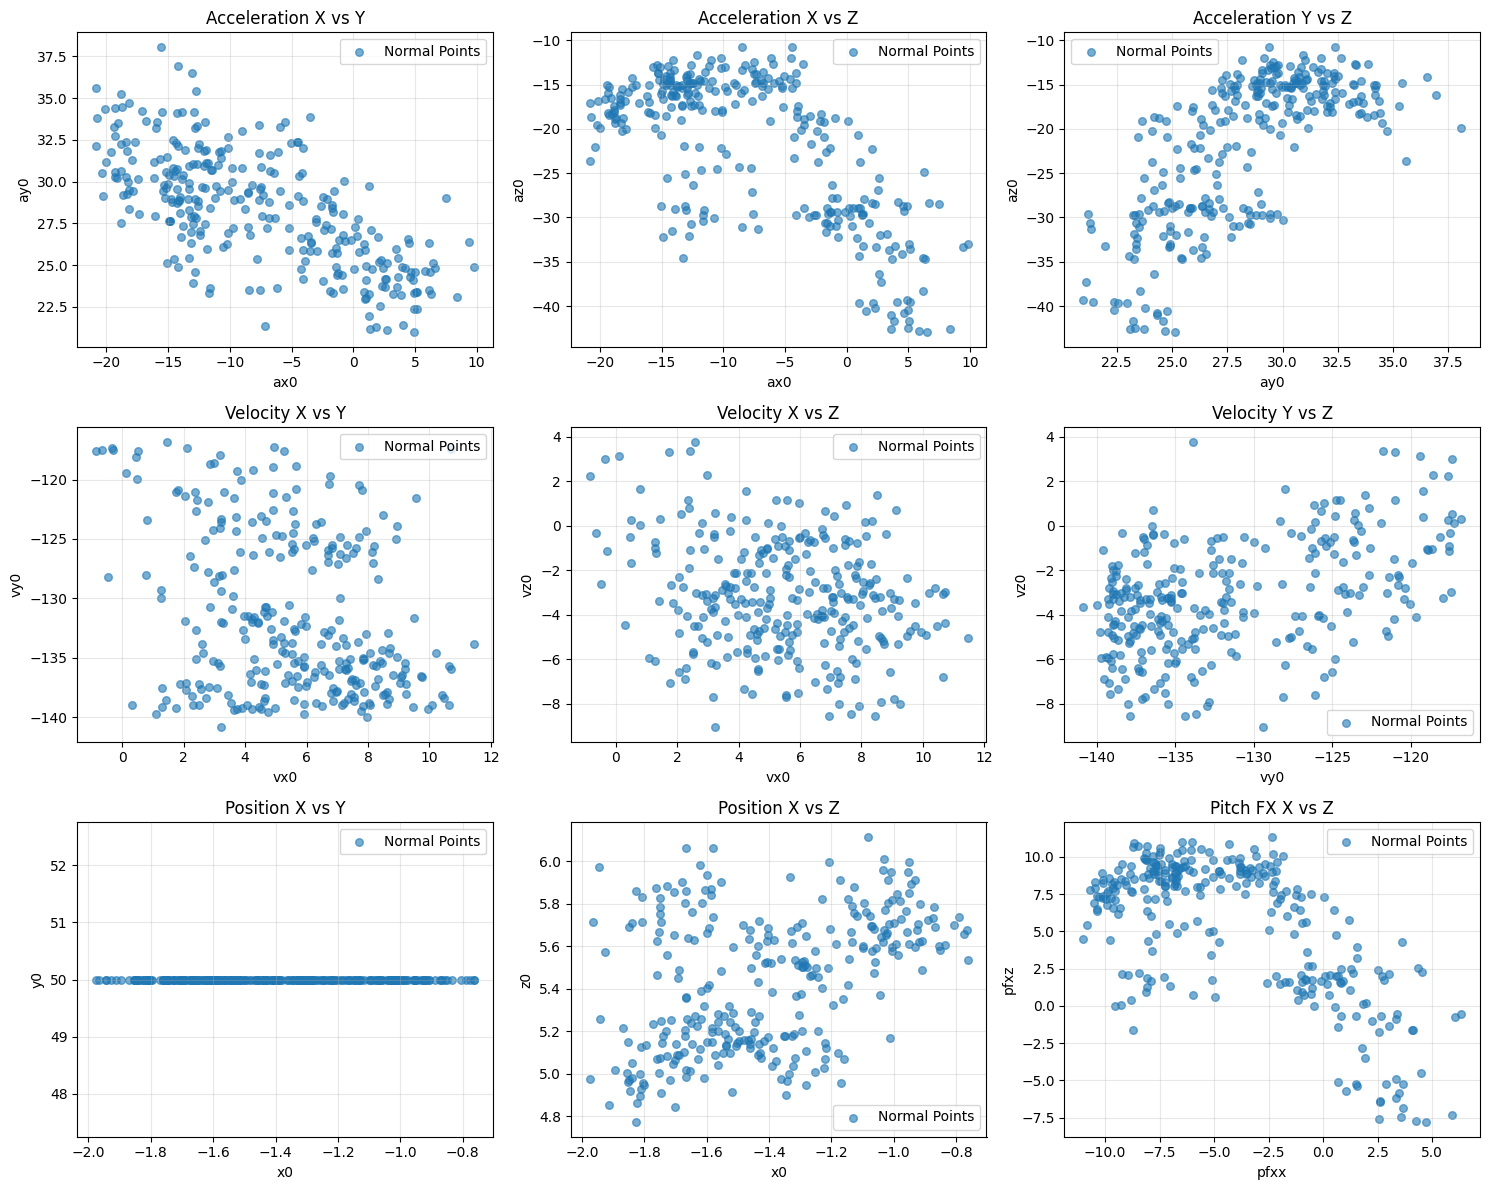

In [334]:
#only for Acceleration
def detect_outliers_acceleration(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val = {}

    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outliers_val = df[np.abs(z_score) > threshold]
            outlier_val[col] = outliers_val
            outlier_indices[col] = outliers
    return outlier_indices , outlier_val

outlier_dict, outlier_val = detect_outliers_acceleration(combined_df[['ax0','ay0','az0','pfxx','pfxz','x0','y0','z0','vx0','vy0','vz0']])
outlier_x = [(col , idx )for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print("-"*50)





# 2D Scatter Plot Visualization
data = combined_df[['ax0','ay0','az0','pfxx','pfxz','x0','y0','z0','vx0','vy0','vz0']]

# Get all outlier indices combined
outlier_indices = []
for col in outlier_dict:
    outlier_indices.extend(outlier_dict[col])
outlier_indices = list(set(outlier_indices))

print(f"\nTotal unique outlier records: {len(outlier_indices)}")

# Create multiple 2D scatter plots to visualize relationships
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Define interesting pairs to plot
plot_pairs = [
    ('ax0', 'ay0', 'Acceleration X vs Y'),
    ('ax0', 'az0', 'Acceleration X vs Z'),
    ('ay0', 'az0', 'Acceleration Y vs Z'),
    ('vx0', 'vy0', 'Velocity X vs Y'),
    ('vx0', 'vz0', 'Velocity X vs Z'),
    ('vy0', 'vz0', 'Velocity Y vs Z'),
    ('x0', 'y0', 'Position X vs Y'),
    ('x0', 'z0', 'Position X vs Z'),
    ('pfxx', 'pfxz', 'Pitch FX X vs Z')
]

for i, (x_col, y_col, title) in enumerate(plot_pairs):
    if i < len(axes):
        # Plot normal points
        normal_mask = ~data.index.isin(outlier_indices)
        axes[i].scatter(data.loc[normal_mask, x_col], 
                       data.loc[normal_mask, y_col], 
                       alpha=0.6, label='Normal Points', s=30)
        
        # Plot outlier points
        if len(outlier_indices) > 0:
            outlier_data = data.loc[outlier_indices]
            axes[i].scatter(outlier_data[x_col], 
                           outlier_data[y_col], 
                           color='red', s=80, label='Outliers', 
                           edgecolors='black', alpha=0.8)
        
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].set_title(title)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

# Hide any unused subplots
for i in range(len(plot_pairs), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Additional: Box plots for each variable to see outliers clearly
variables_with_outliers = [col for col in outlier_dict if len(outlier_dict[col]) > 0]

if variables_with_outliers:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(variables_with_outliers[:6]):  # Show first 6 variables with outliers
        if i < len(axes):
            axes[i].boxplot(data[col].dropna())
            axes[i].set_title(f'{col} - Box Plot\n({len(outlier_dict[col])} outliers)')
            axes[i].set_ylabel('Values')
    
    # Hide unused subplots
    for i in range(len(variables_with_outliers[:6]), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()



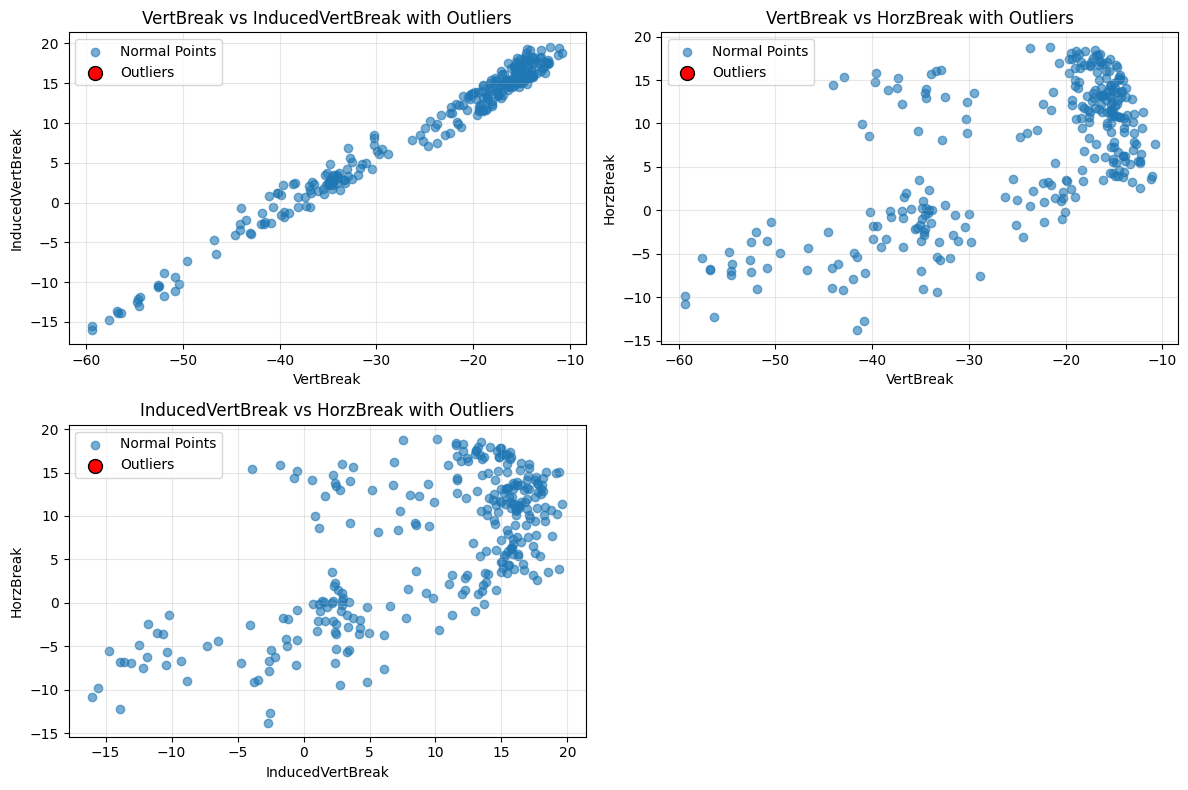

In [335]:
#only for Break / Movement

def detect_outliers_break_movement(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val = {}

    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outliers_val = df[np.abs(z_score) > threshold]
            outlier_val[col] = outliers_val
            outlier_indices[col] = outliers
    return outlier_indices , outlier_val

outlier_dict, outlier_val = detect_outliers_break_movement(combined_df[['VertBreak','InducedVertBreak','HorzBreak']])
outlier_x = [(col , idx ) for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print("-"*50)



data = combined_df[['VertBreak','InducedVertBreak','HorzBreak']]

# Visual Representation of Outlier - 2D Version
plt.figure(figsize=(12, 8))

# Plot VertBreak vs InducedVertBreak
plt.subplot(2, 2, 1)
plt.scatter(data['VertBreak'], data['InducedVertBreak'], alpha=0.6, label='Normal Points')

# Highlight Outliers
outlier_indices = list(outlier_dict['VertBreak']) + list(outlier_dict['InducedVertBreak']) + list(outlier_dict['HorzBreak'])
outlier_indices = list(set(outlier_indices))

plt.scatter(data.loc[outlier_indices, 'VertBreak'],
            data.loc[outlier_indices, 'InducedVertBreak'],
            color='red', s=100, label='Outliers', edgecolors='black')

plt.xlabel('VertBreak')
plt.ylabel('InducedVertBreak')
plt.title('VertBreak vs InducedVertBreak with Outliers')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot VertBreak vs HorzBreak
plt.subplot(2, 2, 2)
plt.scatter(data['VertBreak'], data['HorzBreak'], alpha=0.6, label='Normal Points')
plt.scatter(data.loc[outlier_indices, 'VertBreak'],
            data.loc[outlier_indices, 'HorzBreak'],
            color='red', s=100, label='Outliers', edgecolors='black')
plt.xlabel('VertBreak')
plt.ylabel('HorzBreak')
plt.title('VertBreak vs HorzBreak with Outliers')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot InducedVertBreak vs HorzBreak
plt.subplot(2, 2, 3)
plt.scatter(data['InducedVertBreak'], data['HorzBreak'], alpha=0.6, label='Normal Points')
plt.scatter(data.loc[outlier_indices, 'InducedVertBreak'],
            data.loc[outlier_indices, 'HorzBreak'],
            color='red', s=100, label='Outliers', edgecolors='black')
plt.xlabel('InducedVertBreak')
plt.ylabel('HorzBreak')
plt.title('InducedVertBreak vs HorzBreak with Outliers')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PlateLocHeight: 1 outliers
Index([206], dtype='int64')
     PlateLocHeight  PlateLocSide
206          5.6254       1.19668
--------------------------------------------------
PlateLocSide: 1 outliers
Index([214], dtype='int64')
     PlateLocHeight  PlateLocSide
214         0.13874      -2.56064
--------------------------------------------------


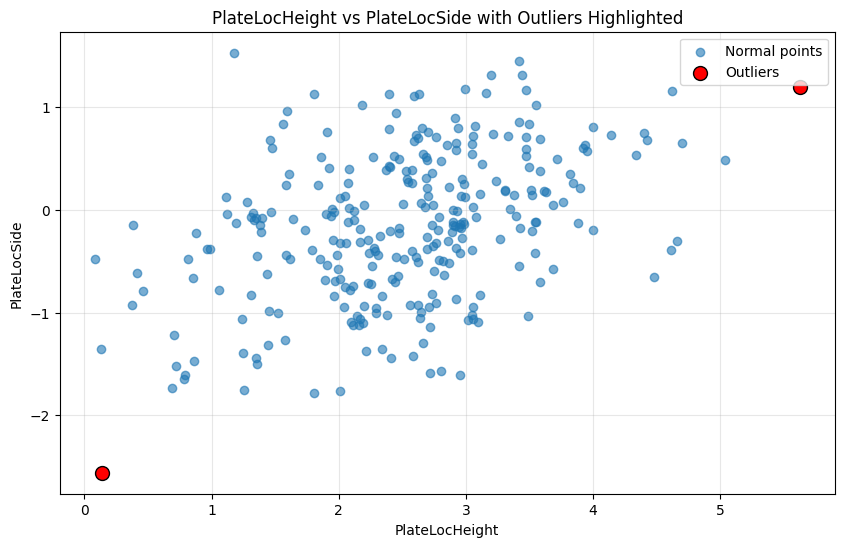

In [336]:
#only for Position / Location

def detect_outliers_position_location(df,threshold = 3 ):
    outlier_indices ={}
    outlier_val={}

    for col in df.select_dtypes(include=['float64','int64']).columns:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_score = (df[col] - mean) / std
            outliers = df[np.abs(z_score) > threshold].index
            outliers_val = df[np.abs(z_score) > threshold]
            outlier_val[col]=outliers_val
            outlier_indices[col] = outliers
    return outlier_indices  , outlier_val

outlier_dict,outlier_val = detect_outliers_position_location(combined_df[['PlateLocHeight','PlateLocSide']])
outlier_x = [(col , idx )for  col, idx in outlier_dict.items() if len(idx) > 0]
for col ,idx in outlier_x:
    print(f"{col}: {len(idx)} outliers")
    print(idx)
    print(outlier_val[col])
    print('-'*50)


# Create outlier_indices list for dropping later
outlier_indices = list(outlier_dict['PlateLocHeight']) + list(outlier_dict['PlateLocSide'])    
outlier_indices_position_location = list(set(outlier_indices))


data=combined_df[['PlateLocHeight','PlateLocSide']]

#Visual Representation of Outlier
plt.figure(figsize=(10, 6))
plt.scatter(data['PlateLocHeight'], data['PlateLocSide'], alpha=0.6, label='Normal points')

# Highlight outliers
outlier_indices = list(outlier_dict['PlateLocHeight']) + list(outlier_dict['PlateLocSide'])
outlier_indices = list(set(outlier_indices))  # Remove duplicates

plt.scatter(data.loc[outlier_indices, 'PlateLocHeight'], 
           data.loc[outlier_indices, 'PlateLocSide'], 
           color='red', s=100, label='Outliers', edgecolors='black')

plt.xlabel('PlateLocHeight')
plt.ylabel('PlateLocSide')
plt.title('PlateLocHeight vs PlateLocSide with Outliers Highlighted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [337]:
#Drop Outlier from ['PlateLocHeight','PlateLocSide']

print(f"Before dropping: {combined_df.shape}")

combined_df = combined_df.drop(outlier_indices_position_location)

print(f"After dropping: {combined_df.shape}")
print(f"Removed {len(outlier_indices_position_location)} outlier rows")

Before dropping: (289, 175)
After dropping: (287, 175)
Removed 2 outlier rows


Data Inconsistencies

In [338]:
#Exact Match columns
x=combined_df.columns.tolist()
matches_columns=[item for item in contact_df if item in pitch_df]
y=[col for col in x if  col in matches_columns]
# Columns with simler safix as their columns names
x = combined_df.columns.tolist()
matches_columns = [item for item in contact_df if item in pitch_df]
y1 = [col for col in x if any(match in col for match in matches_columns)]
print(f"columns which are same column name with suffix in both dataframes{y1}")
print(f"columns which are same column name in both dataframes{y}")

columns which are same column name with suffix in both dataframes['PitchId', 'PAofInning_x', 'PitchofPA_x', 'Inning_x', 'Top_Bottom_x', 'PitchCall_x', 'KorBB_x', 'OutsOnPlay_x', 'RunsScored_x', 'GameUID_x', 'PlayId_x', 'PitchUID_x', 'PAofInning_y', 'PitchofPA_y', 'Inning_y', 'Top_Bottom_y', 'PitchCall_y', 'KorBB_y', 'OutsOnPlay_y', 'RunsScored_y', 'GameUID_y', 'PlayId_y', 'PitchUID_y']
columns which are same column name in both dataframes['PitchId']


In [339]:
x_val = [base for base in combined_df.columns if base.split("_")[-1] == 'x'] 
y_val = [base for base in combined_df.columns if base.split("_")[-1] == 'y'] 
x_val.sort() 
y_val.sort()
suffix_columns = [] 

if all(col in combined_df.columns for col in x_val) and all(col in combined_df.columns for col in y_val): 
    suffix_columns.append((x_val, y_val)) 

for x_cols, y_cols in suffix_columns: 

    if len(x_cols) != len(y_cols):
            print(f"Warning: Different number of x and y columns ({len(x_cols)} vs {len(y_cols)})") 
        
    for x_col, y_col in zip(x_cols, y_cols): 
        mask = combined_df[x_col].notna() & combined_df[y_col].notna()
        inconsistencies = combined_df[mask & (combined_df[x_col] != combined_df[y_col])]
        print(f"{x_col} & {y_col}: Found {len(inconsistencies)} data inconsistencies")
        # Deleting the Index Values With Inconsistence's
        if len(inconsistencies) > 0:
            print("Sample inconsistencies:")
            print(inconsistencies[[x_col, y_col]])
            inconsistencies_row = inconsistencies.index
            combined_df=combined_df.drop(inconsistencies_row)

GameUID_x & GameUID_y: Found 0 data inconsistencies
Inning_x & Inning_y: Found 0 data inconsistencies
KorBB_x & KorBB_y: Found 0 data inconsistencies
OutsOnPlay_x & OutsOnPlay_y: Found 0 data inconsistencies
PAofInning_x & PAofInning_y: Found 0 data inconsistencies
PitchCall_x & PitchCall_y: Found 0 data inconsistencies
PitchUID_x & PitchUID_y: Found 0 data inconsistencies
PitchofPA_x & PitchofPA_y: Found 2 data inconsistencies
Sample inconsistencies:
     PitchofPA_x  PitchofPA_y
20             3          4.0
292            1          2.0
PlayId_x & PlayId_y: Found 0 data inconsistencies
RunsScored_x & RunsScored_y: Found 0 data inconsistencies
Top_Bottom_x & Top_Bottom_y: Found 0 data inconsistencies


Many-to-One Resolution for ID-Name Inconsistency

In [340]:
#Checking the Names of Batter with differenct BatterId's
batter_id_issues=combined_df.groupby('Batter')['BatterId'].nunique()
batter_id_issues=batter_id_issues[batter_id_issues > 1]
print("Batters with multiple IDs:")
print(batter_id_issues)

#Checking the Names of Batter with differenct BatterId's
pitcher_name_issues = combined_df.groupby('PitcherId')['Pitcher'].nunique()
pitcher_name_issues = pitcher_name_issues[pitcher_name_issues > 1]
print("\nPitchers with multiple names:")
print(pitcher_name_issues)

Batters with multiple IDs:
Batter
Bernal, Leonardo    2
Name: BatterId, dtype: int64

Pitchers with multiple names:
PitcherId
676153    2
Name: Pitcher, dtype: int64


In [341]:
#Solving the Record Linkage of Batter's Name with BatterId
def fix_batter_id(df):
    name_id_mapping = df.groupby('Batter')['BatterId'].agg(lambda x:x.value_counts().index[0]).to_dict() 
    df['BatterId'] = df['Batter'].map(name_id_mapping)
    return df
combined_df=fix_batter_id(combined_df)

#Solving the Record Linkage of PitcherId with Pitcher
def fix_pitcher_id(df):
    pitcher_id_issue = df.groupby('PitcherId')['Pitcher'].agg(lambda x:x.value_counts().index[0]).to_dict()
    df['Pitcher'] = df['PitcherId'].map(pitcher_id_issue)
    return df
combined_df=fix_pitcher_id(combined_df)

Data Integrity Issues

In [342]:
# Finding the No of mismatch team Count
mismatch_team=combined_df[combined_df['CatcherTeam'] != combined_df['PitcherTeam']]
print(f"found : {len(mismatch_team)} team mismatches")

found : 12 team mismatches


In [343]:
# Getting the index values of mismatch teams

mismatch_indices = combined_df[combined_df['CatcherTeam'] != combined_df['PitcherTeam']].index.tolist()
print(mismatch_indices)
combined_df=combined_df.drop(mismatch_indices,axis=0)
print(f"Deleted {len(mismatch_indices)} problematic rows")
print(f"Remaining rows: {len(combined_df)}")

[98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Deleted 12 problematic rows
Remaining rows: 273


Date(year) Inconsistency

In [344]:
# Find the index where year is 2024
year_2024_date=[]
year_2024_indices=[]
for idx,date in enumerate(combined_df['UTCDate']):
    if '2024' in str(date) :
        year_2024_date.append(date)
        year_2024_indices.append(idx)

print(f"Found {len(year_2024_date)} dates with year 2024:")
print(year_2024_indices)

Found 0 dates with year 2024:
[]


In [346]:
#Quick fix for just row 100
#combined_df.loc[100, 'Date'] = combined_df.loc[100, 'Date'].replace(year=2025)
#print(f"✅ Fixed row 100: {combined_df.loc[100, 'Date']} now matches UTCDate")

Solving Column Collision

In [ ]:
for col in combined_df.columns:
    if col.endswith("_x"):
        base = col[:-2]
        y_col = base + '_y'
        if y_col in combined_df.columns:
            contact_df[base] = combined_df[y_col].combine_first(combined_df[col])
            combined_df.drop(columns=[col,y_col],inplace=True)

In [ ]:
#Removing the column PitcherSet from dataframe it didn't any Values 
combined_df['PitcherSet'].isna().sum()
combined_df.drop(columns='PitcherSet',inplace=True)

Avg Exit Velocity 

In [ ]:
# Find the Exit Velocity Column
velocity_columns = [col for col in combined_df.columns if any(word in col.lower() for word in ['speed', 'velocity', 'exit', 'hit'])]
print("Possible exit velocity columns:")
print(velocity_columns)

Possible exit velocity columns:
['RelSpeed', 'ZoneSpeed', 'SpeedDrop', 'ThrowSpeed', 'TaggedHitType', 'AutoHitType', 'ExitSpeed', 'HitSpinRate', 'HitSpinAxis', 'HitTrajectoryXc0', 'HitTrajectoryXc1', 'HitTrajectoryXc2', 'HitTrajectoryXc3', 'HitTrajectoryXc4', 'HitTrajectoryXc5', 'HitTrajectoryXc6', 'HitTrajectoryXc7', 'HitTrajectoryXc8', 'HitTrajectoryYc0', 'HitTrajectoryYc1', 'HitTrajectoryYc2', 'HitTrajectoryYc3', 'HitTrajectoryYc4', 'HitTrajectoryYc5', 'HitTrajectoryYc6', 'HitTrajectoryYc7', 'HitTrajectoryYc8', 'HitTrajectoryZc0', 'HitTrajectoryZc1', 'HitTrajectoryZc2', 'HitTrajectoryZc3', 'HitTrajectoryZc4', 'HitTrajectoryZc5', 'HitTrajectoryZc6', 'HitTrajectoryZc7', 'HitTrajectoryZc8', 'HitLaunchConfidence', 'HitLandingConfidence']


In [ ]:
# Identify Batted Ball Events
batted_ball_column =[col for col in combined_df.columns if any(word in col.lower() for word in ['play', 'result', 'outcome', 'description'])]
print("Possible batted ball indicator columns:")
print(batted_ball_column)

Possible batted ball indicator columns:
['OutsOnPlay_x', 'PlayId_x', 'PlayResult', 'OutsOnPlay_y', 'PlayId_y']


In [ ]:
print(combined_df['PlayResult'].unique())

[nan 'Double' 'Out' 'FieldersChoice' 'Single' 'Error']


In [ ]:
valid_results =['Double','Out','FieldersChoice','Single']

filter_df = combined_df[combined_df['PlayResult'].isin(valid_results)]

In [ ]:
# Avg Exit Velocity ! 
avg_exit_velocity = filter_df['ExitSpeed'].mean()
avg_exit_velocity

np.float64(84.81219080000001)

In [ ]:
filter_df.groupby('PlayResult')['ExitSpeed'].mean()

PlayResult
Double            97.972480
FieldersChoice    71.018710
Out               82.811216
Single            90.289337
Name: ExitSpeed, dtype: float64